# Goal Of The Project

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

# Read the Data

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
tr= pd.read_csv("C:/Users/User/Downloads/training_set.csv")


In [4]:
tr.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Drop Unnecessary columns

In [6]:
for i in tr.columns:
    print(i,len(tr[i].unique()))

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 111
LotArea 1073
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 328
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 637
BsmtFinType2 7
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageYrBlt 98
GarageFinish 4
GarageCars 5
GarageArea 441
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 4
Fence 5
MiscFeature 5
MiscV

In [7]:
tr=tr.drop(["Id"],axis=1)

# Missing Data treatment

In [8]:
from preprocessing_6PM import replacer
replacer(tr)

In [9]:
tr.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Define X and Y

In [10]:
Y=tr[["SalePrice"]]
X=tr.drop("SalePrice",axis=1)

# Seperate categorical and Continuos coloumns

In [11]:
cat=[]
con=[]
for i in X.columns:
    if(X[i].dtypes== "object"):
        cat.append(i)     
    else:
        con.append(i)

In [12]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [13]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#  checking for skew

In [14]:
X.skew().sort_values()>0.8

GarageYrBlt      False
YearBuilt        False
YearRemodAdd     False
GarageCars       False
FullBath         False
YrSold           False
GarageArea       False
BedroomAbvGr     False
MoSold           False
OverallQual      False
BsmtFullBath     False
Fireplaces       False
HalfBath         False
TotRmsAbvGrd     False
OverallCond      False
2ndFlrSF          True
BsmtUnfSF         True
GrLivArea         True
1stFlrSF          True
MSSubClass        True
TotalBsmtSF       True
WoodDeckSF        True
BsmtFinSF1        True
OpenPorchSF       True
LotFrontage       True
MasVnrArea        True
EnclosedPorch     True
BsmtHalfBath      True
ScreenPorch       True
BsmtFinSF2        True
KitchenAbvGr      True
LowQualFinSF      True
3SsnPorch         True
LotArea           True
PoolArea          True
MiscVal           True
dtype: bool

In [15]:
col_with_skew=["2ndFlrSF","BsmtUnfSF","GrLivArea","1stFlrSF","MSSubClass","TotalBsmtSF","WoodDeckSF","BsmtFinSF1","OpenPorchSF","LotFrontage","MasVnrArea","EnclosedPorch","BsmtHalfBath","ScreenPorch","BsmtFinSF2","KitchenAbvGr","LowQualFinSF","3SsnPorch","LotArea","PoolArea","MiscVal"]

In [16]:
X1 = X[col_with_skew].apply(np.log)
X = X.drop(labels=col_with_skew,axis=1) 
X = X.join(X1)

# Checking Correlation

<AxesSubplot:>

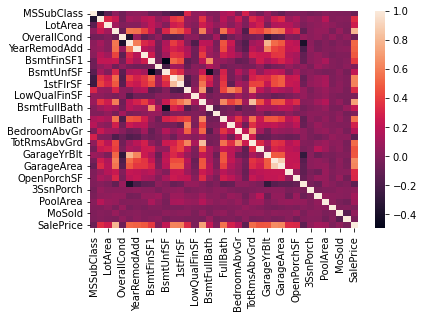

In [17]:
import seaborn as sb
sb.heatmap(tr.corr())

In [18]:
imp_cols = list(tr.corr()["SalePrice"].sort_values().index)[22:]
imp_cols.remove("SalePrice")

<AxesSubplot:>

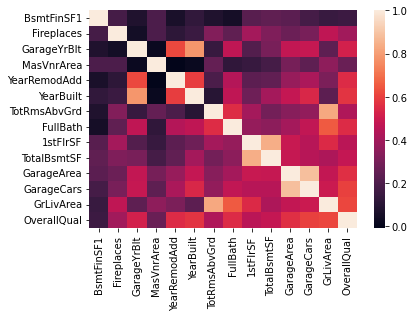

In [19]:
sb.heatmap(X[imp_cols].corr())

# Data Pre-processing

In [20]:
X1 = pd.get_dummies(tr[cat])
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2 = pd.DataFrame(ss.fit_transform(tr[imp_cols]),columns=imp_cols)
X = X2.join(X1)

# OLS 

In [21]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     66.99
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:45:49   Log-Likelihood:                -16670.
No. Observations:                1460   AIC:                         3.379e+04
Df Residuals:                    1237   BIC:                         3.497e+04
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7015.1135   2619.173      2.678      0.007    1876.601    1.22e+04
BsmtFinSF1             9043.3102   1300.963      6.951      0.000    6490.972    1.16e+04
Fireplaces             2657.3018   1017.622      2.611      0.009     660.845    4653.758
GarageYrBlt           -1207.5639   1401.958     -0.861      0.389   -3958.042    1542.914
MasVnrArea             4011.4220   1086.769      3.691      0.000    1879.308    6143.536
YearRemodAdd           4570.5265   1116.546      4.093      0.000    2379.993    6761.060
YearBuilt              4887.3637   2249.781      2.172      0.030     473.556    9301.172
TotRmsAbvGrd            719.2450   1463.794      0.491      0.623   -2152.549    3591.039
FullBath               1178.5094   1134.332      1.039      0.299   -1046.919    3403.938
1stFlrSF              -4649.5108   2720.765     -1.709      0.088   -9987.335     688.313
TotalBsmtSF            5675.9290   1806.701      3.142      0.002    2131.392    9220.466
GarageArea             3963.9238   1727.569      2.295      0.022     574.635    7353.212
GarageCars             2297.4824   1711.918      1.342      0.180   -1061.102    5656.067
GrLivArea              3.335e+04   3039.886     10.970      0.000    2.74e+04    3.93e+04
OverallQual            9736.6684   1455.488      6.690      0.000    6881.170    1.26e+04
MSZoning_C (all)      -2.872e+04   8396.517     -3.420      0.001   -4.52e+04   -1.22e+04
MSZoning_FV             1.34e+04   6220.416      2.154      0.031    1197.424    2.56e+04
MSZoning_RH            8524.0450   6181.621      1.379      0.168   -3603.576    2.07e+04
MSZoning_RL            9505.1430   3283.695      2.895      0.004    3062.916    1.59e+04
MSZoning_RM            4301.1372   3718.743      1.157      0.248   -2994.603    1.16e+04
Street_Grvl            -545.1965   6497.521     -0.084      0.933   -1.33e+04    1.22e+04
Street_Pave            7560.3100   5989.311      1.262      0.207   -4190.020    1.93e+04
Alley_Grvl             3271.2513   2711.531      1.206      0.228   -2048.456    8590.959
Alley_Pave             3743.8622   2884.119      1.298      0.194   -1914.444    9402.168
LotShape_IR1          -4481.1843   2701.742     -1.659      0.097   -9781.688     819.320
LotShape_IR2           3963.3938   3886.118      1.020      0.308   -3660.717    1.16e+04
LotShape_IR3           1.117e+04   6769.993      1.651      0.099   -2107.690    2.45e+04
LotShape_Reg          -3641.3446   2790.831     -1.305      0.192   -9116.630    1833.941
LandContour_Bnk       -1073.5310   3258.151     -0.329      0.742   -7465.645    5318.583
LandContour_HLS        7087.1191   3360.510      2.109      0.035     494.190    1.37e+04
LandContour_Low       -3644.6390   4291.025     -0.849      0.396   -1.21e+04    4773.853
LandContour_Lvl        

In [22]:
model.pvalues.sort_values().index

Index(['RoofMatl_ClyTile', 'GrLivArea', 'Condition2_PosN', 'RoofMatl_WdShngl',
       'BldgType_1Fam', 'BsmtExposure_Gd', 'BsmtFinSF1',
       'Neighborhood_StoneBr', 'OverallQual', 'KitchenQual_Ex',
       ...
       'HeatingQC_Po', 'LandSlope_Gtl', 'SaleType_ConLD',
       'Neighborhood_BrkSide', 'HeatingQC_Gd', 'Exterior2nd_Brk Cmn',
       'PavedDrive_P', 'BsmtExposure_Av', 'Condition1_RRNn',
       'Exterior2nd_MetalSd'],
      dtype='object', length=267)

In [23]:
Q = pd.DataFrame(model.pvalues,columns=["Pval"])
M = []
for i in Q.Pval:
    M.append(round(i,3))

Q.Pval = M
Q[Q.Pval > 0.9].index

Index(['Street_Grvl', 'LandSlope_Gtl', 'LandSlope_Sev', 'Neighborhood_BrkSide',
       'Condition1_Feedr', 'Condition1_RRNn', 'RoofStyle_Flat',
       'Exterior1st_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_MetalSd',
       'Exterior2nd_Wd Shng', 'ExterCond_Fa', 'Foundation_BrkTil',
       'BsmtQual_Fa', 'BsmtExposure_Av', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'Electrical_SBrkr', 'PavedDrive_P', 'SaleType_ConLD'],
      dtype='object')

In [24]:
Q[Q.Pval > 0.9]

,Pval
Street_Grvl,0.933
LandSlope_Gtl,0.958
LandSlope_Sev,0.903
Neighborhood_BrkSide,0.966
Condition1_Feedr,0.910
Condition1_RRNn,0.991
RoofStyle_Flat,0.901
Exterior1st_AsphShn,0.941
Exterior2nd_Brk Cmn,0.972
Exterior2nd_MetalSd,0.994


In [25]:
X=X.drop(["Street_Grvl","LandSlope_Gtl","LandSlope_Sev","Neighborhood_BrkSide","Condition1_Feedr","Condition1_RRNn","RoofStyle_Flat","Exterior1st_AsphShn","Exterior2nd_Brk Cmn","Exterior2nd_MetalSd","Exterior2nd_Wd Shng","ExterCond_Fa","Foundation_BrkTil","BsmtQual_Fa","BsmtExposure_Av","HeatingQC_Gd","HeatingQC_Po","HeatingQC_TA","Electrical_SBrkr","PavedDrive_P","SaleType_ConLD"],axis=1)

In [26]:
from statsmodels.api import add_constant,OLS
X1 = add_constant(X)
ols = OLS(Y,X1)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     69.19
Date:                Sat, 09 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:46:20   Log-Likelihood:                -16670.
No. Observations:                1460   AIC:                         3.377e+04
Df Residuals:                    1243   BIC:                         3.492e+04
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6608.9073   5955.938      1.110      0.267   -5075.895    1.83e+04
BsmtFinSF1             9041.5975   1295.608      6.979      0.000    6499.778    1.16e+04
Fireplaces             2657.9079   1011.237      2.628      0.009     673.988    4641.828
GarageYrBlt           -1206.3496   1394.770     -0.865      0.387   -3942.712    1530.013
MasVnrArea             4009.3969   1082.202      3.705      0.000    1886.252    6132.542
YearRemodAdd           4576.2909   1105.936      4.138      0.000    2406.583    6745.998
YearBuilt              4870.2474   2220.049      2.194      0.028     514.791    9225.704
TotRmsAbvGrd            716.4551   1455.911      0.492      0.623   -2139.859    3572.769
FullBath               1179.9077   1130.005      1.044      0.297   -1037.021    3396.836
1stFlrSF              -4650.7620   2706.990     -1.718      0.086   -9961.536     660.012
TotalBsmtSF            5674.1871   1801.679      3.149      0.002    2139.520    9208.855
GarageArea             3955.2821   1712.862      2.309      0.021     594.861    7315.703
GarageCars             2307.3212   1697.636      1.359      0.174   -1023.228    5637.870
GrLivArea              3.336e+04   3021.696     11.039      0.000    2.74e+04    3.93e+04
OverallQual            9731.9785   1442.950      6.745      0.000    6901.092    1.26e+04
MSZoning_C (all)      -2.886e+04   8323.295     -3.467      0.001   -4.52e+04   -1.25e+04
MSZoning_FV            1.336e+04   6288.719      2.125      0.034    1024.755    2.57e+04
MSZoning_RH            8449.4254   6312.782      1.338      0.181   -3935.460    2.08e+04
MSZoning_RL            9440.5282   3424.805      2.757      0.006    2721.492    1.62e+04
MSZoning_RM            4213.1512   3797.381      1.109      0.267   -3236.833    1.17e+04
Street_Pave            8040.1168   1.18e+04      0.679      0.498   -1.52e+04    3.13e+04
Alley_Grvl             3063.0449   3804.898      0.805      0.421   -4401.688    1.05e+04
Alley_Pave             3545.8624   3925.626      0.903      0.367   -4155.723    1.12e+04
LotShape_IR1          -4597.1361   2969.221     -1.548      0.122   -1.04e+04    1228.102
LotShape_IR2           3869.1940   4098.677      0.944      0.345   -4171.896    1.19e+04
LotShape_IR3           1.109e+04   6901.227      1.607      0.108   -2449.450    2.46e+04
LotShape_Reg          -3753.0396   3043.630     -1.233      0.218   -9724.258    2218.179
LandContour_Bnk       -1221.3188   3496.023     -0.349      0.727   -8080.076    5637.439
LandContour_HLS        6993.6348   3610.659      1.937      0.053     -90.024    1.41e+04
LandContour_Low       -3680.4503   4375.196     -0.841      0.400   -1.23e+04    4903.134
LandContour_Lvl        4517.0416   2694.132      1.677      0.094    -768.507    9802.590
Utilities_AllPub       

In [27]:
X.columns

Index(['BsmtFinSF1', 'Fireplaces', 'GarageYrBlt', 'MasVnrArea', 'YearRemodAdd',
       'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

# Divide the data in training and testing set

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
xtrain,xtest,ytrain,ytest=train_test_split(X,Y, random_state=31,test_size=0.2)

# Ridge Model Creation

In [29]:
x = 0.95
for i in range(0,20):
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.00005

=============== 0.95 =============
Training Error:  14362.76
Testing Error:  19707.59
Overfitting
=============== 0.95005 =============
Training Error:  14362.79
Testing Error:  19707.59
Overfitting
=============== 0.9501 =============
Training Error:  14362.82
Testing Error:  19707.59
Overfitting
=============== 0.9501499999999999 =============
Training Error:  14362.84
Testing Error:  19707.59
Overfitting
=============== 0.9501999999999999 =============
Training Error:  14362.87
Testing Error:  19707.59
Overfitting
=============== 0.9502499999999999 =============
Training Error:  14362.9
Testing Error:  19707.59
Overfitting
=============== 0.9502999999999999 =============
Training Error:  14362.92
Testing Error:  19707.59
Overfitting
=============== 0.9503499999999999 =============
Training Error:  14362.95
Testing Error:  19707.58
Overfitting
=============== 0.9503999999999999 =============
Training Error:  14362.98
Testing Error:  19707.58
Overfitting
=============== 0.950449999999

# Lasso 

In [30]:
x = 1
for i in range(0,20):
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha=x)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = round(mean_absolute_error(ytrain,tr_pred),2)
    ts_err = round(mean_absolute_error(ytest,ts_pred),2)
    print("===============",x,"=============")
    print("Training Error: ",tr_err)
    print("Testing Error: ",ts_err)
    if(tr_err < ts_err):
        print("Overfitting")
    
    x = x + 0.05

=============== 1 =============
Training Error:  13584.58
Testing Error:  19403.77
Overfitting
=============== 1.05 =============
Training Error:  13585.23
Testing Error:  19400.79
Overfitting
=============== 1.1 =============
Training Error:  13585.88
Testing Error:  19397.79
Overfitting
=============== 1.1500000000000001 =============
Training Error:  13586.56
Testing Error:  19394.98
Overfitting
=============== 1.2000000000000002 =============
Training Error:  13587.27
Testing Error:  19393.19
Overfitting
=============== 1.2500000000000002 =============
Training Error:  13587.92
Testing Error:  19390.41
Overfitting
=============== 1.3000000000000003 =============
Training Error:  13588.57
Testing Error:  19387.63
Overfitting
=============== 1.3500000000000003 =============
Training Error:  13589.23
Testing Error:  19384.71
Overfitting
=============== 1.4000000000000004 =============
Training Error:  13589.95
Testing Error:  19381.18
Overfitting
=============== 1.4500000000000004 ===

In [31]:
X.columns

Index(['BsmtFinSF1', 'Fireplaces', 'GarageYrBlt', 'MasVnrArea', 'YearRemodAdd',
       'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=245)

# Test Data

In [32]:
ts=pd.read_csv("C:/Users/User/Downloads/testing_set.csv")

In [33]:
ts.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [34]:
ts.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [35]:
replacer(ts)

In [36]:
ts.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

In [37]:
cols_keep = list(xtrain.columns)

In [38]:
cols_keep

['BsmtFinSF1',
 'Fireplaces',
 'GarageYrBlt',
 'MasVnrArea',
 'YearRemodAdd',
 'YearBuilt',
 'TotRmsAbvGrd',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'OverallQual',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Grvl',
 'Alley_Pave',
 'LotShape_IR1',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_AllPub',
 'Utilities_NoSeWa',
 'LotConfig_Corner',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'Neighborhood_Blmngtn',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Nei

In [39]:
cat = []
con = []
for i in ts.columns:
    if(ts[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [40]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [41]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [42]:
X1 = pd.DataFrame(ss.fit_transform(ts[con]),columns=con)

In [43]:
X2 = pd.get_dummies(ts[cat])

In [44]:
X = X1.join(X2)

In [45]:
X[cols_keep]

KeyError: "['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC'] not in index"

In [46]:
cols_to_add=['Utilities_NoSeWa', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Heating_Floor', 'Heating_OthW', 'Electrical_Mix', 'GarageQual_Ex', 'PoolQC_Fa', 'MiscFeature_TenC']

In [47]:
for i in cols_to_add:
    X[i]=0

In [1]:
final_preds = model.predict()

NameError: name 'model' is not defined

In [49]:
ts["Predicted_sale_Price"]=final_preds

In [50]:
final_preds

array([178598.56637648, 242091.34520746, 265620.60588454, ...,
       250432.97985202, 187905.18117778, 294175.90283774])

In [51]:
ts["Predicted_sale_Price"]=final_preds

# Final Result

In [52]:
ts[["Id","Predicted_sale_Price"]].to_csv("Desktop/submission.csv")

In [53]:
pd.set_option("display.max_rows",5000)

In [54]:
ts

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_sale_Price
0,1461,20,RH,80.000000,11622,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,178598.566376
1,1462,20,RL,81.000000,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,242091.345207
2,1463,60,RL,74.000000,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,265620.605885
3,1464,60,RL,78.000000,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,269644.854952
4,1465,120,RL,43.000000,5005,Pave,Grvl,IR1,HLS,AllPub,...,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal,275502.497728
5,1466,60,RL,75.000000,10000,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,251249.358821
6,1467,20,RL,68.580357,7980,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,GdPrv,Shed,500,3,2010,WD,Normal,241640.526776
7,1468,60,RL,63.000000,8402,Pave,Grvl,IR1,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal,243215.124459
8,1469,20,RL,85.000000,10176,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,2,2010,WD,Normal,294531.268224
9,1470,20,RL,70.000000,8400,Pave,Grvl,Reg,Lvl,AllPub,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,197917.781303
